In [1]:
!pip install geetiles
!pip install retry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 5.1 MB/s eta 0:00:00
  Created wheel for geetiles: filename=geetiles-0.1.5-py3-none-any.whl size=27739 sha256=4a9cd61b59b3861fd2540f1358ce14a6892a5c73840fe6c1f4661f27e3083a1c
  Stored in directory: /root/.cache/pip/wheels/d9/50/ec/7b03ec22c4ca40b7922aa803bff8bf0944061d396d55696507
Successfully built geetiles
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/s

In [2]:
!geet grid --aoi_wkt_file boyaca.wkt --chip_size_meters 1000 --aoi_name boy --dest_dir .

-----------------------------------------------------------
Google Earth Engine dataset extractor utility 0.1.5
-----------------------------------------------------------

making grid
inspecting 78144 chips
 [mParallel(n_jobs=7)]: Done 78144 out of 78144 | elapsed: 11.2min finished
aoi covered by 24194 chips

saved to ./boy_partitions_aschips_32bc4829188e3.geojson


In [4]:
#Para descargar las imágenes generadas
!geet download --tiles_file boy_partitions_aschips_32bc4829188e3.geojson  --dataset_def sentinel2-rgb-median-2020 --pixels_lonlat [100,100] --skip_if_exists

-----------------------------------------------------------
Google Earth Engine dataset extractor utility 0.1.5
-----------------------------------------------------------

downloading tiles from GEE

using the following download specficication

tiles_file:        boy_partitions_aschips_32bc4829188e3.geojson
dataset_def        sentinel2-rgb-median-2020
pixels_lonlat      [100, 100]
meters_per_pixel   None
max_downloads      None
shuffle            False
skip_if_exists     True
dtype              uint8
ee_auth_mode       None
n_processes        10

        
confirm (y/N): y
authenticating to Google Earth Engine
trying to use default gee credentials
could not authenticate with default gee credentials, using auth_method = 'notebook'
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=

In [6]:
!geet download --tiles_file boy_partitions_aschips_32bc4829188e3.geojson  --dataset_def esa-world-cover --pixels_lonlat [100,100] --skip_if_exists

-----------------------------------------------------------
Google Earth Engine dataset extractor utility 0.1.5
-----------------------------------------------------------

downloading tiles from GEE

using the following download specficication

tiles_file:        boy_partitions_aschips_32bc4829188e3.geojson
dataset_def        esa-world-cover
pixels_lonlat      [100, 100]
meters_per_pixel   None
max_downloads      None
shuffle            False
skip_if_exists     True
dtype              uint8
ee_auth_mode       None
n_processes        10

        
confirm (y/N): y
authenticating to Google Earth Engine
trying to use default gee credentials
could not authenticate with default gee credentials, using auth_method = 'notebook'
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//

In [7]:
# Boyacá con municipios
!geet select --orig_shapefile boyaca_mpios.shp --aoi_wkt_file boyaca.wkt --tiles_name municipios --aoi_name boy --dest_dir .

-----------------------------------------------------------
Google Earth Engine dataset extractor utility 0.1.5
-----------------------------------------------------------

selecting partitions
reading orig shapefile
selecting geometries
100% (180 of 180) |#######################| Elapsed Time: 0:00:00 Time:  0:00:00

saved to ./boy_partitions_municipios_2b7d11c16b758.geojson


In [ ]:
#Este comando se usa en caso de que tenga predefiniadas las divisiones de interés
!geet download --tiles_file boy_partitions_aschips_32bc4829188e3.geojson  --dataset_def crops.py --pixels_lonlat [100,100] --skip_if_exists --skip_confirm --n_processes 20

-----------------------------------------------------------
Google Earth Engine dataset extractor utility 0.1.4
-----------------------------------------------------------

downloading tiles from GEE
ERROR. file crops.py not found


In [ ]:
#!geet split --tiles_file ris_partitions_aschips_0c309dd93be94.geojson --nbands 8 --train_pct .5 --test_pct 0.3 --val_pct 0.2  --angle 0.78
!geet split --tiles_file boy_partitions_aschips_32bc4829188e3.geojson --nbands 10 --train_pct .5 --test_pct 0.3 --val_pct 0.2  --angle -1.5

-----------------------------------------------------------
Google Earth Engine dataset extractor utility 0.1.4
-----------------------------------------------------------

splitting bands
saved to ris_partitions_aschips_0c309dd93be94.geojson
all splits saved to ris_partitions_aschips_0c309dd93be94_splits.csv


In [15]:
!geet intersect --tiles_file boy_partitions_aschips_32bc4829188e3.geojson --foreign_tiles_file boy_partitions_municipios_2b7d11c16b758.geojson

-----------------------------------------------------------
Google Earth Engine dataset extractor utility 0.1.5
-----------------------------------------------------------

computing intersections with foreign tiles
loading primary tiles from boy_partitions_aschips_32bc4829188e3.geojson
loading foreign tiles from boy_partitions_municipios_2b7d11c16b758.geojson
intersecting geometries with foreign tiles
using foreign partition name 'municipios'
100% (24194 of 24194) |###################| Elapsed Time: 0:02:05 Time:  0:02:05
saved to boy_partitions_aschips_32bc4829188e3.geojson
done!


In [16]:
!geet split --tiles_file boy_partitions_aschips_32bc4829188e3.geojson --nbands 8 --train_pct .5 --test_pct 0.3 --val_pct 0.2  --angle -1.5 --foreign_tiles_name municipios

-----------------------------------------------------------
Google Earth Engine dataset extractor utility 0.1.5
-----------------------------------------------------------

splitting bands
saved to boy_partitions_aschips_32bc4829188e3.geojson
all splits saved to boy_partitions_aschips_32bc4829188e3_splits.csv


In [21]:
!geet lp.compute --tiles_file boy_partitions_aschips_32bc4829188e3.geojson --labels_dataset_def esa-world-cover

-----------------------------------------------------------
Google Earth Engine dataset extractor utility 0.1.5
-----------------------------------------------------------

computing proportions
loading tiles from boy_partitions_aschips_32bc4829188e3.geojson
computing proportions for 24194 partitions
100% (24194 of 24194) |###################| Elapsed Time: 0:01:21 Time:  0:01:21

saved to boy_partitions_aschips_32bc4829188e3.geojson
done!


In [22]:
!geet download --tiles_file boy_partitions_municipios_2b7d11c16b758.geojson  --dataset_def esa-world-cover  --meters_per_pixel 20  --skip_if_exists

-----------------------------------------------------------
Google Earth Engine dataset extractor utility 0.1.5
-----------------------------------------------------------

downloading tiles from GEE

using the following download specficication

tiles_file:        boy_partitions_municipios_2b7d11c16b758.geojson
dataset_def        esa-world-cover
pixels_lonlat      None
meters_per_pixel   20
max_downloads      None
shuffle            False
skip_if_exists     True
dtype              uint8
ee_auth_mode       None
n_processes        10

        
confirm (y/N): y
authenticating to Google Earth Engine
trying to use default gee credentials
could not authenticate with default gee credentials, using auth_method = 'notebook'
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.g

In [23]:
!geet lp.compute --tiles_file boy_partitions_municipios_2b7d11c16b758.geojson --labels_dataset_def esa-world-cover

-----------------------------------------------------------
Google Earth Engine dataset extractor utility 0.1.5
-----------------------------------------------------------

computing proportions
loading tiles from boy_partitions_municipios_2b7d11c16b758.geojson
computing proportions for 123 partitions
100% (123 of 123) |#######################| Elapsed Time: 0:00:02 Time:  0:00:02

saved to boy_partitions_municipios_2b7d11c16b758.geojson
done!


In [25]:
!geet lp.from_foreign --tiles_file boy_partitions_aschips_32bc4829188e3.geojson --foreign_tiles_file boy_partitions_municipios_2b7d11c16b758.geojson --labels_dataset_def esa-world-cover

-----------------------------------------------------------
Google Earth Engine dataset extractor utility 0.1.5
-----------------------------------------------------------

computing proportions from foreign tiles
loading primary tiles from boy_partitions_aschips_32bc4829188e3.geojson
loading foreign tiles from boy_partitions_municipios_2b7d11c16b758.geojson
intersecting geometries and computing label proportions from foreign tiles
100% (24194 of 24194) |###################| Elapsed Time: 0:02:48 Time:  0:02:48
saved to boy_partitions_aschips_32bc4829188e3.geojson
done!


In [27]:
import geopandas as gpd
z=gpd.read_file("./boy_partitions_aschips_32bc4829188e3.geojson")
z.head()

,area_km2,identifier,split,foreignid_municipios,split_municipios,esa-world-cover_proportions,esa-world-cover_proportions_at_municipios,geometry
0,0.998001,051c6bc2755f3,train,1a8f9dd7ad82a,train,"{'1': 0.049, '3': 0.951}","{'1': 0.4153800022065442, '2': 0.0004640968300...","POLYGON ((-74.67543 5.74960, -74.67543 5.75864..."
1,0.998001,23de37d0512c2,train,1a8f9dd7ad82a,train,"{'1': 0.3462, '3': 0.6017, '5': 0.0508, '6': 0...","{'1': 0.4153800022065442, '2': 0.0004640968300...","POLYGON ((-74.67542 5.75865, -74.67542 5.76769..."
2,0.998001,1e578924d98e0,train,1a8f9dd7ad82a,train,"{'1': 0.3833, '2': 0.0005, '3': 0.4014, '5': 0...","{'1': 0.4153800022065442, '2': 0.0004640968300...","POLYGON ((-74.67542 5.76769, -74.67542 5.77673..."
3,0.998001,249373b6da1ec,train,1a8f9dd7ad82a,train,"{'1': 0.3686, '3': 0.6074, '6': 0.0236, '8': 0...","{'1': 0.4153800022065442, '2': 0.0004640968300...","POLYGON ((-74.67541 5.77674, -74.67541 5.78578..."
4,0.998001,110604af98c6e,train,1a8f9dd7ad82a,train,"{'1': 0.5961, '3': 0.4021, '6': 0.0018}","{'1': 0.4153800022065442, '2': 0.0004640968300...","POLYGON ((-74.67541 5.78579, -74.67541 5.79482..."


In [28]:
!geet zip.dataset --tiles_file boy_partitions_aschips_32bc4829188e3.geojson --foreign_tiles_file boy_partitions_municipios_2b7d11c16b758.geojson --images_dataset_def sentinel2-rgb-median-2020 --labels_dataset_def esa-world-cover --readme_file README.txt

-----------------------------------------------------------
Google Earth Engine dataset extractor utility 0.1.5
-----------------------------------------------------------

zipping dataset
preparing folders
creating expanded file for easy visualization of label proportions
saved expanded file to boy_partitions_aschips_32bc4829188e3_expanded.geojson
copying metadata files
reading tiles file
100% (24194 of 24194) |###################| Elapsed Time: 0:02:02 Time:  0:02:02
including 24194 chips, and skipped 0
zipping all content
dataset zip file created: ./boy_sentinel2-rgb-median-2020_esa-world-cover.zip
done!


In [ ]:
#!zip -r /content/ris_sentinel2-rgb-median-2020_esa-world-cover.zip /content/ris_sentinel2-rgb-median-2020_esa-world-cover

  adding: content/ris_sentinel2-rgb-median-2020_esa-world-cover/ (stored 0%)
  adding: content/ris_sentinel2-rgb-median-2020_esa-world-cover/splits.csv (deflated 63%)
  adding: content/ris_sentinel2-rgb-median-2020_esa-world-cover/ris_partitions_aschips_expanded.geojson (deflated 93%)
  adding: content/ris_sentinel2-rgb-median-2020_esa-world-cover/data/ (stored 0%)
  adding: content/ris_sentinel2-rgb-median-2020_esa-world-cover/data/09fcf07a8c06c.pkl (deflated 99%)
  adding: content/ris_sentinel2-rgb-median-2020_esa-world-cover/data/338c9dfac5233.pkl (deflated 99%)
  adding: content/ris_sentinel2-rgb-median-2020_esa-world-cover/data/2d491e98bd1d7.pkl (deflated 57%)
  adding: content/ris_sentinel2-rgb-median-2020_esa-world-cover/data/2de7994d666e0.pkl (deflated 99%)
  adding: content/ris_sentinel2-rgb-median-2020_esa-world-cover/data/38a1cb50654ef.pkl (deflated 65%)
  adding: content/ris_sentinel2-rgb-median-2020_esa-world-cover/data/3677034b04db2.pkl (deflated 61%)
  adding: content/ri

In [29]:
from google.colab import files
files.download('/content/boy_sentinel2-rgb-median-2020_esa-world-cover.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Graficación de geojson

In [8]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!geet split --tiles_file boy_partitions_aschips_32bc4829188e3.geojson --nbands 10 --train_pct .5 --test_pct 0.3 --val_pct 0.2  --angle -1.5

-----------------------------------------------------------
Google Earth Engine dataset extractor utility 0.1.5
-----------------------------------------------------------

splitting bands
saved to boy_partitions_aschips_32bc4829188e3.geojson
all splits saved to boy_partitions_aschips_32bc4829188e3_splits.csv


In [10]:
!geet split --tiles_file boy_partitions_aschips_32bc4829188e3.geojson --nbands 10 --train_pct .5 --test_pct 0.3 --val_pct 0.2  --angle -1.5 --foreign_tiles_name municipios

-----------------------------------------------------------
Google Earth Engine dataset extractor utility 0.1.5
-----------------------------------------------------------

splitting bands
Traceback (most recent call last):
  File "/usr/local/bin/geet", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/geetiles/main.py", line 134, in main
    split(tiles_file         = args.tiles_file, 
  File "/usr/local/lib/python3.10/dist-packages/geetiles/cmds.py", line 38, in split
    p.split_per_partitions(nbands=nbands, angle=angle, 
  File "/usr/local/lib/python3.10/dist-packages/geetiles/partitions.py", line 368, in split_per_partitions
    self.data[f'split_{other_partitions_id}'] = self.data.groupby(f'foreignid_{other_partitions_id}')[['split']]\
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 8402, in groupby
    return DataFrameGroupBy(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/groupby.py", line 9

In [11]:
import geopandas as gpd

In [17]:
data = gpd.read_file("./boy_partitions_aschips_32bc4829188e3.geojson")

In [18]:
data

,area_km2,identifier,split,foreignid_municipios,split_municipios,geometry
0,0.998001,051c6bc2755f3,train,1a8f9dd7ad82a,train,"POLYGON ((-74.67543 5.74960, -74.67543 5.75864..."
1,0.998001,23de37d0512c2,train,1a8f9dd7ad82a,train,"POLYGON ((-74.67542 5.75865, -74.67542 5.76769..."
2,0.998001,1e578924d98e0,train,1a8f9dd7ad82a,train,"POLYGON ((-74.67542 5.76769, -74.67542 5.77673..."
3,0.998001,249373b6da1ec,train,1a8f9dd7ad82a,train,"POLYGON ((-74.67541 5.77674, -74.67541 5.78578..."
4,0.998001,110604af98c6e,train,1a8f9dd7ad82a,train,"POLYGON ((-74.67541 5.78579, -74.67541 5.79482..."
...,...,...,...,...,...,...
24189,0.998041,35655cc11848f,val,1775785975690,val,"POLYGON ((-72.00550 6.93432, -72.00550 6.94334..."
24190,0.998041,1c3ad505f81df,val,1775785975690,val,"POLYGON ((-72.00544 6.94335, -72.00544 6.95237..."
24191,0.998041,28e9ed916732d,val,1775785975690,val,"POLYGON ((-72.00538 6.95238, -72.00538 6.96141..."
24192,0.998041,0f9007d4a068d,val,1775785975690,val,"POLYGON ((-72.00532 6.96142, -72.00532 6.97044..."


In [19]:
data["graphsplit"] = [0 if i=="train" else 1 if i=="test" else 2 for i in data.split_municipios]

In [20]:
data.explore(column="graphsplit")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install geodatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shapely as sh
import geopandas as gpd
import geodatasets
import folium
import matplotlib.pyplot as plt
import mapclassify
from pyproj import CRS

In [ ]:
data=gpd.read_file("ris_partitions_aschips_expanded.geojson")

<Axes: >

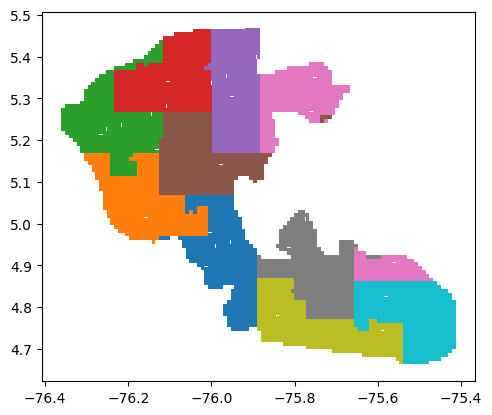

In [ ]:
data.plot(column="geometry")

In [ ]:
gd=gpd.GeoDataFrame(data2,columns=["split","geometry"], crs=CRS.from_epsg(4326))
gd.explore()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
m = folium.Map(location=[4.801132, -75.690875], zoom_start=10, tiles="CartoDB positron")
data2=gpd.read_file("ris_partitions_aschips.geojson")
for _, r in data2.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x:{"fillColor":"#E440E8" if r["split"]=="train" else ("#DFB03C" if r["split"]=="test" else "#28CC2F"),'color': 'black','weight': 1,'dashArray': '5, 5'})
    folium.Popup(r["split"]).add_to(geo_j)
    geo_j.add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.